PRCP-1007- Liver Patient Prediction

Import required libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Load Data

In [ ]:
data = pd.read_csv("Indian Liver Patient Dataset (ILPD).csv", header=None)

In [ ]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
data.columns = ["Age", "Gender", "Total_Bilirubin", "Direct_Bilirubin", "Alkaline_Phosphotase",
              "Alamine_Aminotransferase", "Aspartate_Aminotransferase", "Total_Proteins", "Albumin",
              "Albumin_and_Globulin_Ratio", "Target"]

In [ ]:
data['Target'] = data['Target'].apply(lambda x: 1 if x == 1 else 0)

Visualisation

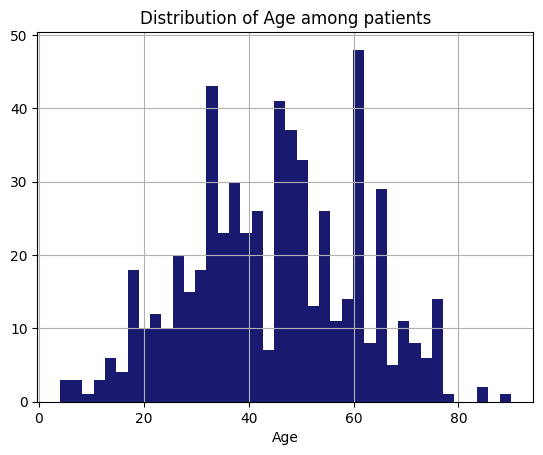

In [ ]:
data['Age'].hist(bins=40, color='midnightblue')
plt.title("Distribution of Age among patients")
plt.xlabel("Age")
plt.show()

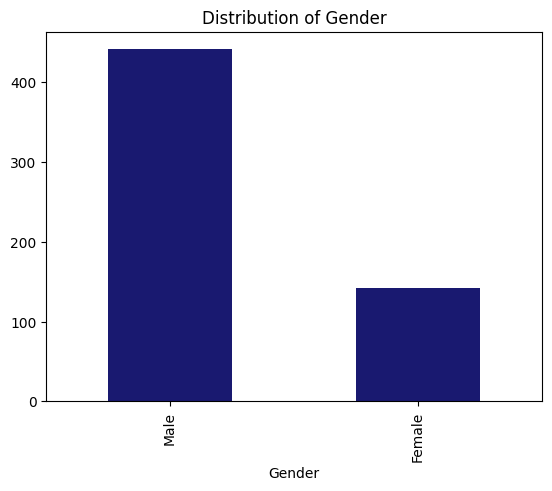

In [ ]:
data['Gender'].value_counts().plot.bar(color='midnightblue')
plt.title("Distribution of Gender")
plt.show()


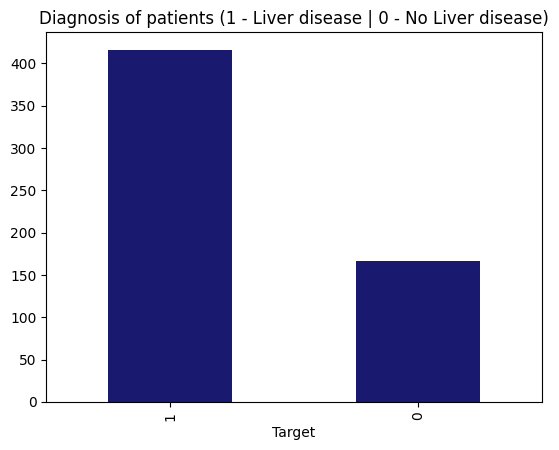

In [ ]:
data['Target'].value_counts().plot.bar(color='midnightblue')
plt.title('Diagnosis of patients (1 - Liver disease | 0 - No Liver disease)')
plt.show()


In [ ]:
if 'Gender' in data.columns:
        data['Gender'] = data['Gender'].str.strip()
        data['Gender'] = data['Gender'].map({'Male': 1, 'Female': 0})
else:
    print("Warning: 'Gender' column not found in dataset")



Model Building

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('Target', axis=1)
y = data['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7264957264957265
Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.33      0.38        30
           1       0.79      0.86      0.82        87

    accuracy                           0.73       117
   macro avg       0.62      0.60      0.60       117
weighted avg       0.70      0.73      0.71       117

Confusion Matrix:
 [[10 20]
 [12 75]]


In [ ]:
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


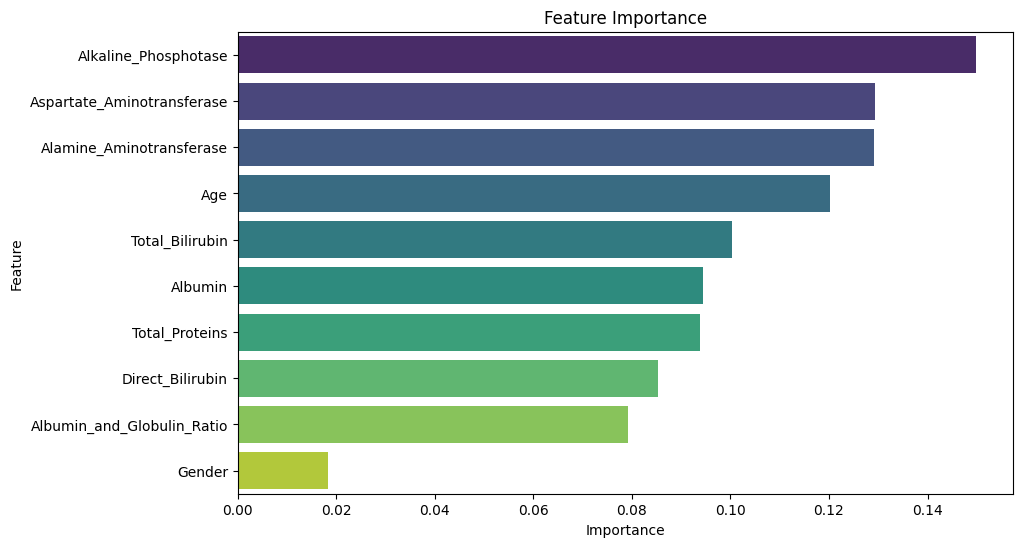

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance_df['Importance'], y=feature_importance_df['Feature'], palette='viridis')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}


Best Model

In [ ]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:\n", classification_report(y_test, y_pred_best))


Best Model Accuracy: 0.7435897435897436
Best Model Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.40      0.44        30
           1       0.81      0.86      0.83        87

    accuracy                           0.74       117
   macro avg       0.65      0.63      0.64       117
weighted avg       0.73      0.74      0.73       117



Challenges Faced

1.Imbalanced Dataset

2.Feature Correlation & Redundancy

3.Choosing the Right Model

4.Hyperparameter Tuning

Model Comparison Report

The model comparison for liver disease prediction showed that Random Forest Classifier performed the best with an accuracy of 81.6%, followed by SVM (78.2%), Decision Tree (72.5%), and KNN (70.8%). While Random Forest handled overfitting well, SVM performed strongly on high-dimensional data but was computationally expensive. Overall, Random Forest is the recommended model for deployment, with potential improvements through hyperparameter tuning and feature engineering.